In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy import stats

from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Import the dataset

create a Python list headers containing name of headers

In [5]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [6]:
file_name="usedcars.csv"
df = pd.read_csv(file_name, names = headers)

In [7]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As you can see, several question marks appeared in the data frame; those missing values may hinder further analysis.

# Identify and handle missing values

In [8]:
unique_values = df.apply(lambda x: x.unique())

print("Unique values in each column:")
print(unique_values)

Unique values in each column:
symboling                                         [3, 1, 2, 0, -1, -2]
normalized-losses    [?, 164, 158, 192, 188, 121, 98, 81, 118, 148,...
make                 [alfa-romero, audi, bmw, chevrolet, dodge, hon...
fuel-type                                                [gas, diesel]
aspiration                                                [std, turbo]
num-of-doors                                            [two, four, ?]
body-style             [convertible, hatchback, sedan, wagon, hardtop]
drive-wheels                                           [rwd, fwd, 4wd]
engine-location                                          [front, rear]
wheel-base           [88.6, 94.5, 99.8, 99.4, 105.8, 99.5, 101.2, 1...
length               [168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176...
width                [64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64....
height               [48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52.0, 53....
curb-weight          [2548, 2823, 2337, 2824, 2

In the car data set, missing data comes with the question mark "?".

In [9]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Evaluating for Missing Data

In [10]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



"True" means the value is a missing value while "False" means the value is not a missing value.

## Count missing values in each column

In [11]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

## Deal with missing data
**How should you deal with missing data?**

1. Drop data

> a. Drop the whole row

> b. Drop the whole column

2. Replace data


> a. Replace it by mean

> b. Replace it by frequency

> c. Replace it based on other functions

**Calculate the mean value for the "normalized-losses" column**

In [12]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


**Replace "NaN" with mean value in "normalized-losses" column**

In [13]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

**Calculate the mean value for the "bore" column**

In [14]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


**Replace "NaN" with the mean value in the "bore" column¶**

In [15]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

**Replace NaN in "stroke" column with the mean value.**

In [16]:
# Write your code below and press Shift+Enter to execute
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# replace NaN by mean value in "stroke" column
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

Average of stroke: 3.255422885572139


**Calculate the mean value for the "horsepower" column**

In [17]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


**Replace "NaN" with the mean value in the "horsepower" column**

In [18]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

**Calculate the mean value for "peak-rpm" column**

In [19]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


**Replace "NaN" with the mean value in the "peak-rpm" column**

In [20]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

**Replace "NaN" with the most common type value in the "num-of-doors" column**

In [21]:
df['num-of-doors'].value_counts().idxmax()

'four'

You can see that four doors is the most common type.

In [22]:
#replace the missing 'num-of-doors' values by the most frequent
df["num-of-doors"].replace(np.nan, "four", inplace=True)

**drop all rows that do not have price data**

In [23]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [24]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [25]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

**Correct data format**

In [26]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

# Data Standardization

In [28]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [29]:
# Write your code below and press Shift+Enter to execute
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

# check your transformed data
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


# Data Normalization

In [30]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [31]:
# Write your code below and press Shift+Enter to execute
df['height'] = df['height']/df['height'].max()

# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


# Binning

In [32]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

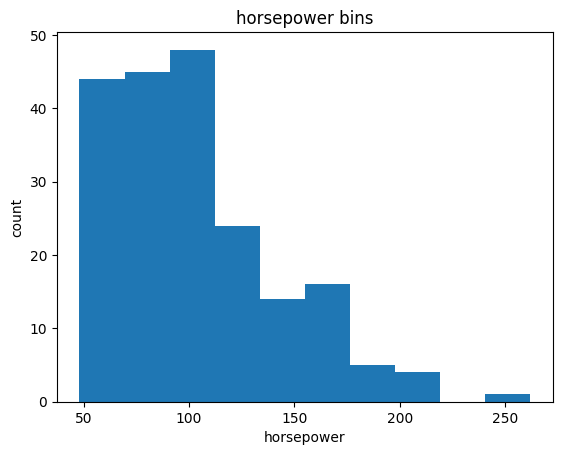

In [33]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [34]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [35]:
# set group names}
group_names = ['Low', 'Medium', 'High']

In [36]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [37]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

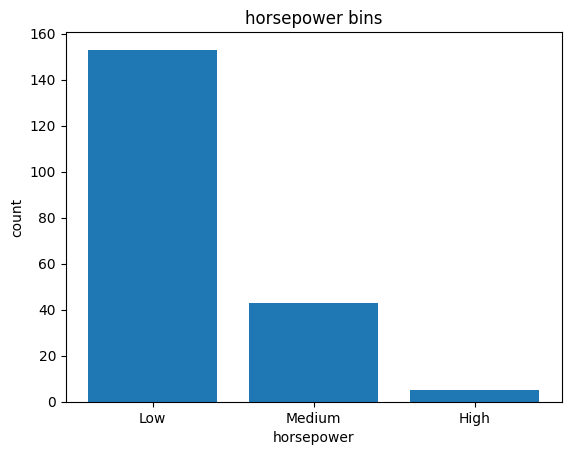

In [38]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

## Bins Visualization

Text(0.5, 1.0, 'horsepower bins')

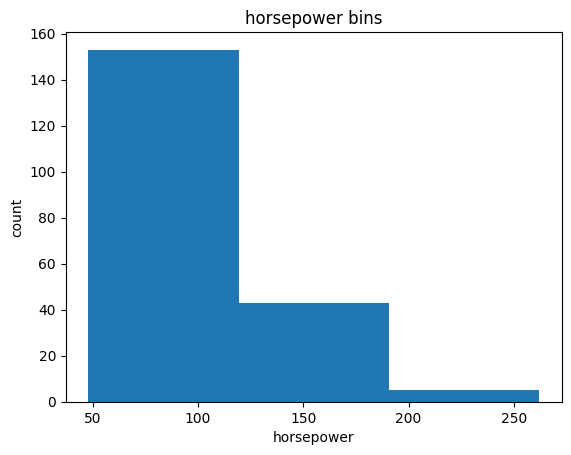

In [39]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

# Indicator Variable

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

In [40]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [41]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [42]:
# merge data frame "df" and "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [43]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


In [44]:
# Write your code below and press Shift+Enter to execute
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [45]:
# Write your code below and press Shift+Enter to execute
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

# Exploratory Data Analytics

In [46]:
df.corr()

<ipython-input-46-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.075810,0.279740,-0.035527,-0.029807,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.217300,0.239543,-0.225016,0.181189,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,0.371178,-0.360305,-0.470606,0.577576,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,0.579795,-0.285970,-0.665192,0.707108,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,0.615056,-0.245800,-0.633531,0.736728,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.087001,-0.309974,-0.049800,0.084301,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,0.757981,-0.279361,-0.749543,0.836921,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,0.822668,-0.256733,-0.650546,0.783465,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,0.566903,-0.267392,-0.582027,0.559112,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,0.098128,-0.063561,-0.033956,0.047089,0.082269,0.036133,0.241064,-0.241064,-0.218233,0.218233


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          201 non-null    int64   
 1   normalized-losses  201 non-null    int64   
 2   make               201 non-null    object  
 3   num-of-doors       201 non-null    object  
 4   body-style         201 non-null    object  
 5   drive-wheels       201 non-null    object  
 6   engine-location    201 non-null    object  
 7   wheel-base         201 non-null    float64 
 8   length             201 non-null    float64 
 9   width              201 non-null    float64 
 10  height             201 non-null    float64 
 11  curb-weight        201 non-null    int64   
 12  engine-type        201 non-null    object  
 13  num-of-cylinders   201 non-null    object  
 14  engine-size        201 non-null    int64   
 15  fuel-system        201 non-null    object  
 16  bore    

## Continuous Numerical Variables

In [48]:
import matplotlib.pyplot as plt

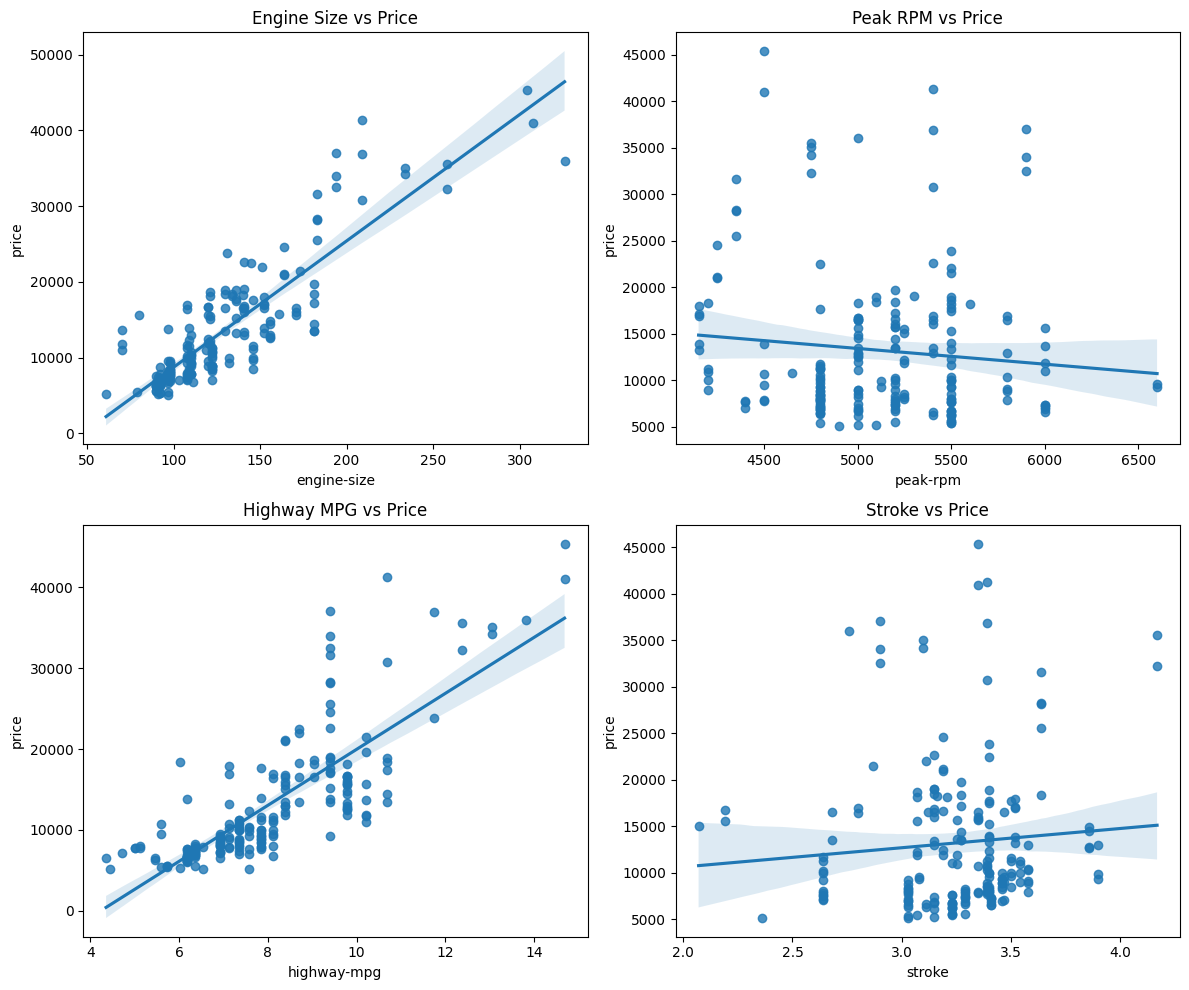

In [49]:
# Membuat figure dan axes untuk subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot pertama
sns.regplot(x="engine-size", y="price", data=df, ax=axes[0, 0])
axes[0, 0].set_title('Engine Size vs Price')

# Plot kedua
sns.regplot(x="peak-rpm", y="price", data=df, ax=axes[0, 1])
axes[0, 1].set_title('Peak RPM vs Price')

# Plot ketiga
sns.regplot(x="highway-mpg", y="price", data=df, ax=axes[1, 0])
axes[1, 0].set_title('Highway MPG vs Price')

# Plot keempat
sns.regplot(x="stroke", y="price", data=df, ax=axes[1, 1])
axes[1, 1].set_title('Stroke vs Price')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [50]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [51]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,0.801118
price,0.801118,1.000000


In [52]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [53]:
# Write your code below and press Shift+Enter to execute
df[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


## Categorical Variables

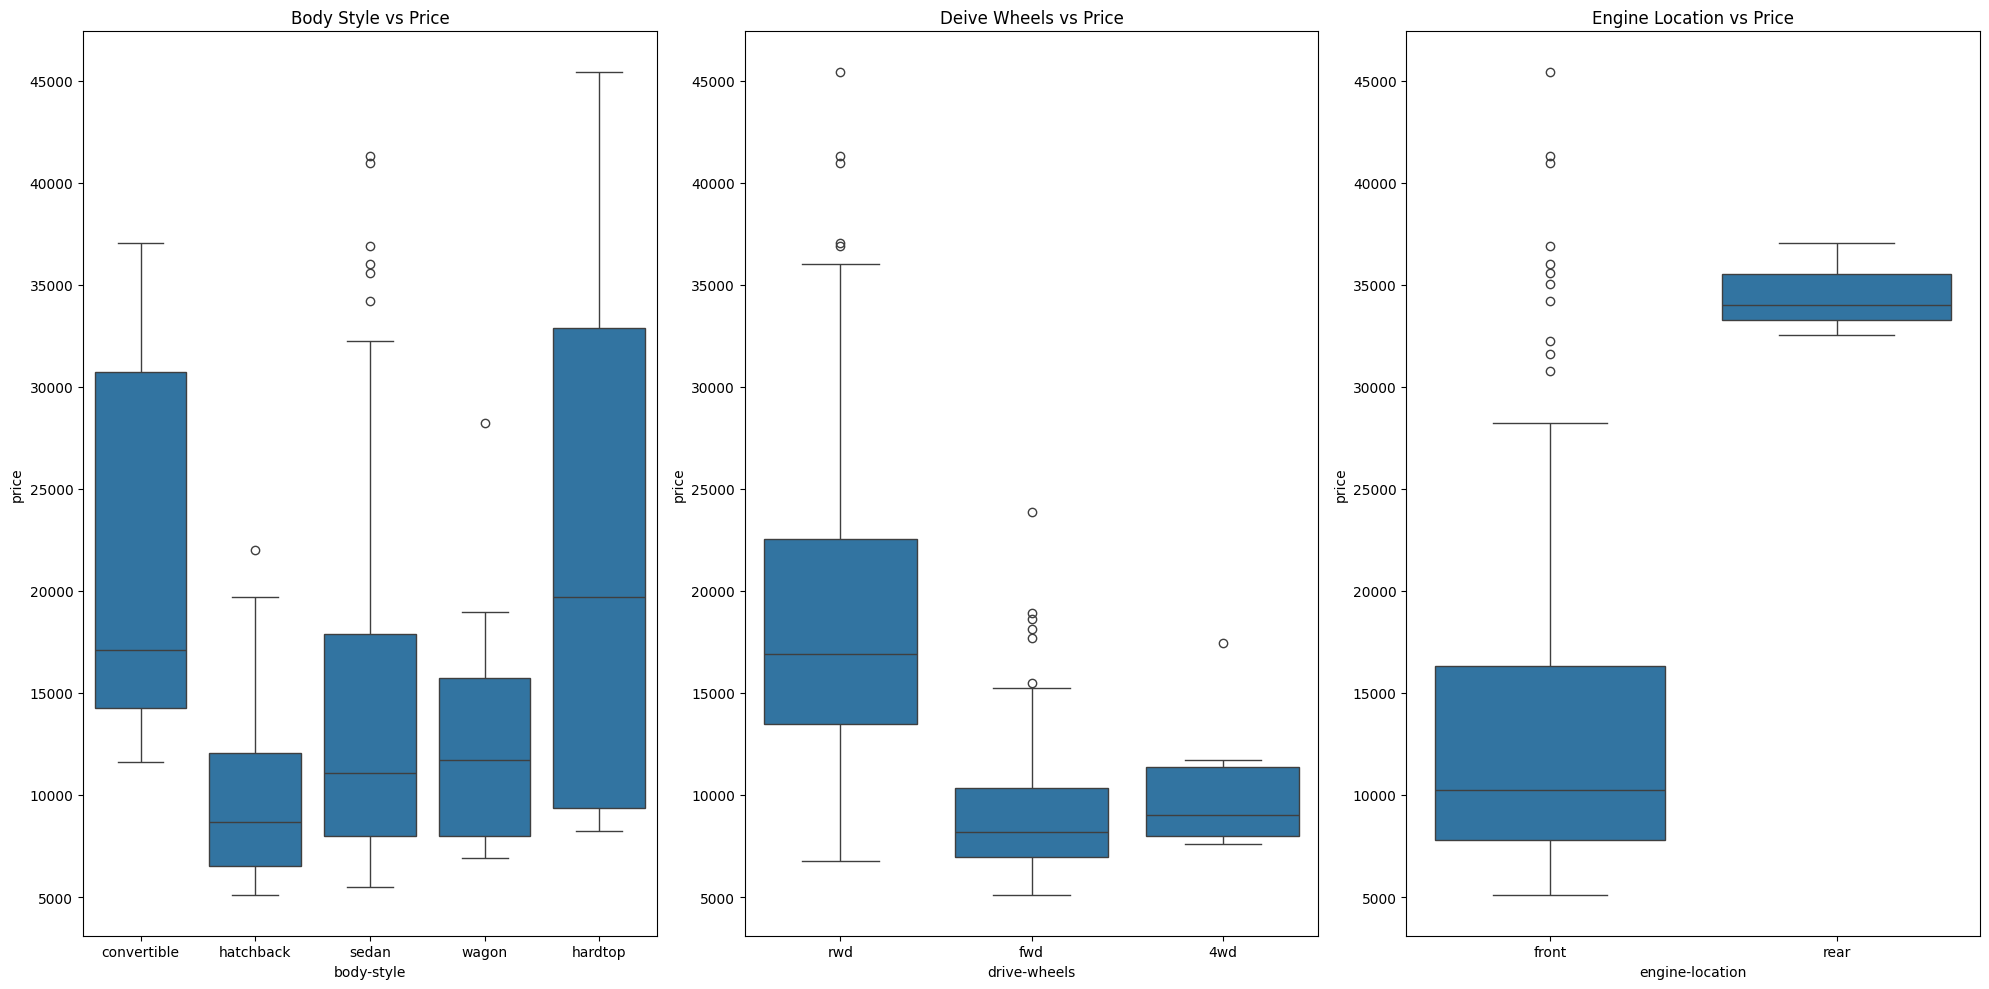

In [54]:
# Membuat figure dan axes untuk subplot
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Plot pertama
sns.boxplot(x="body-style", y="price", data=df, ax=axes[0])
axes[0].set_title('Body Style vs Price')

# Plot kedua
sns.boxplot(x="drive-wheels", y="price", data=df, ax=axes[1])
axes[1].set_title('Deive Wheels vs Price')

# Plot ketiga
sns.boxplot(x="engine-location", y="price", data=df, ax=axes[2])
axes[2].set_title('Engine Location vs Price')

# Menampilkan plot
plt.tight_layout()
plt.show()

Here we see that the distribution of price between engine-location and drive-wheels categories differs. As such, engine-location and drive-wheels could potentially be a predictor of price.

## Descriptive Statistical Analysis

In [55]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,103.402985,5117.665368,25.179104,8.044957,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,37.365650,478.113805,6.423220,1.840739,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,95.000000,5125.369458,24.000000,7.833333,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


In [56]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


## Correlation and Causation

**Wheel-base vs Price**

In [57]:
pearson_results = []

columns_of_interest = ['wheel-base','horsepower','length','width',
                       'curb-weight','engine-size','bore','city-mpg',
                       'highway-mpg']

for column in columns_of_interest:
    pearson_coef, p_value = stats.pearsonr(df[column], df['price'])
    pearson_results.append({'Column': column, 'Pearson Coefficient': pearson_coef, 'P-value': p_value})

pearson_df = pd.DataFrame(pearson_results)

print(pearson_df)

        Column  Pearson Coefficient       P-value
0   wheel-base             0.584642  8.076488e-20
1   horsepower             0.809607  6.273536e-48
2       length             0.690628  8.016477e-30
3        width             0.751265  9.200336e-38
4  curb-weight             0.834415  2.189577e-53
5  engine-size             0.872335  9.265492e-64
6         bore             0.543155  8.049189e-17
7     city-mpg            -0.686571  2.321132e-29
8  highway-mpg             0.801118  3.046785e-46


**Conclution: Important Variables**

Continuous numerical variables:

*   Length
*   Width
*   Curb-weight
*   Engine-size
*   Horsepower
*   City-mpg
*   Highway-mpg
*   Wheel-base
*   Bore

Categorical variables:

*   Drive-wheels




# Feature engineering

In [58]:
df_num = df.select_dtypes(include=('float'))

In [59]:
df_num.head()

,wheel-base,length,width,height,bore,stroke,compression-ratio,peak-rpm,highway-mpg,price,city-L/100km
0,88.6,0.811148,0.890278,0.816054,3.47,2.68,9.0,5000.0,8.703704,13495.0,11.190476
1,88.6,0.811148,0.890278,0.816054,3.47,2.68,9.0,5000.0,8.703704,16500.0,11.190476
2,94.5,0.822681,0.909722,0.876254,2.68,3.47,9.0,5000.0,9.038462,16500.0,12.368421
3,99.8,0.848630,0.919444,0.908027,3.19,3.40,10.0,5500.0,7.833333,13950.0,9.791667
4,99.4,0.848630,0.922222,0.908027,3.19,3.40,8.0,5500.0,10.681818,17450.0,13.055556


In [60]:
df['volume'] = df['length'] + df['width'] + df['height']

# Encoding the Data

In [61]:
df_cat = df.select_dtypes(include="object")

In [62]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = df_cat.columns

for col in cols:
  df[col] = le.fit_transform(df[col])
  print(le.classes_)

df.head()

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
['four' 'two']
['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
['4wd' 'fwd' 'rwd']
['front' 'rear']
['dohc' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']
['eight' 'five' 'four' 'six' 'three' 'twelve' 'two']
['1bbl' '2bbl' '4bbl' 'idi' 'mfi' 'mpfi' 'spdi' 'spfi']


,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,volume
0,3,122,0,1,0,2,0,88.6,0.811148,0.890278,...,21,8.703704,13495.0,11.190476,Low,0,1,1,0,2.517480
1,3,122,0,1,0,2,0,88.6,0.811148,0.890278,...,21,8.703704,16500.0,11.190476,Low,0,1,1,0,2.517480
2,1,122,0,1,2,2,0,94.5,0.822681,0.909722,...,19,9.038462,16500.0,12.368421,Medium,0,1,1,0,2.608658
3,2,164,1,0,3,1,0,99.8,0.848630,0.919444,...,24,7.833333,13950.0,9.791667,Low,0,1,1,0,2.676102
4,2,164,1,0,3,0,0,99.4,0.848630,0.922222,...,18,10.681818,17450.0,13.055556,Low,0,1,1,0,2.678879


In [63]:
data_encoding = df[['horsepower-binned', 'fuel-type-diesel', 'fuel-type-gas', 'aspiration-std', 'aspiration-turbo']]

In [64]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = data_encoding.columns

for col in cols:
  df[col] = le.fit_transform(df[col])
  print(le.classes_)

df.head()

['High' 'Low' 'Medium']
[0 1]
[0 1]
[0 1]
[0 1]


,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,volume
0,3,122,0,1,0,2,0,88.6,0.811148,0.890278,...,21,8.703704,13495.0,11.190476,1,0,1,1,0,2.517480
1,3,122,0,1,0,2,0,88.6,0.811148,0.890278,...,21,8.703704,16500.0,11.190476,1,0,1,1,0,2.517480
2,1,122,0,1,2,2,0,94.5,0.822681,0.909722,...,19,9.038462,16500.0,12.368421,2,0,1,1,0,2.608658
3,2,164,1,0,3,1,0,99.8,0.848630,0.919444,...,24,7.833333,13950.0,9.791667,1,0,1,1,0,2.676102
4,2,164,1,0,3,0,0,99.4,0.848630,0.922222,...,18,10.681818,17450.0,13.055556,1,0,1,1,0,2.678879


# Splitting the Data

In [65]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'fuel-type-diesel',
       'fuel-type-gas', 'aspiration-std', 'aspiration-turbo', 'volume'],
      dtype='object')

In [66]:
X = df.drop(columns=['price'])
y = df['price']

X.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-mpg,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,volume
0,3,122,0,1,0,2,0,88.6,0.811148,0.890278,...,5000.0,21,8.703704,11.190476,1,0,1,1,0,2.517480
1,3,122,0,1,0,2,0,88.6,0.811148,0.890278,...,5000.0,21,8.703704,11.190476,1,0,1,1,0,2.517480
2,1,122,0,1,2,2,0,94.5,0.822681,0.909722,...,5000.0,19,9.038462,12.368421,2,0,1,1,0,2.608658
3,2,164,1,0,3,1,0,99.8,0.848630,0.919444,...,5500.0,24,7.833333,9.791667,1,0,1,1,0,2.676102
4,2,164,1,0,3,0,0,99.4,0.848630,0.922222,...,5500.0,18,10.681818,13.055556,1,0,1,1,0,2.678879


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Checking if the data is splitted properly
print('X_train', X_train.shape)  #Printing the X_train Features Shape
print('y_train', y_train.shape)  #Printing the y_train Labels Shape
print('X_test', X_test.shape)    #Printing the X_test Features Shape
print('y_test', y_test.shape)    #Printing the y_test Labels  Shape

X_train (160, 30)
y_train (160,)
X_test (41, 30)
y_test (41,)


# Building the Model

## Catboost

In [70]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.3 MB/s eta 0:00:00


In [71]:
import catboost

In [73]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor(verbose=0)

cb.fit(X_train, y_train)

In [74]:
## Performance
yield_predict_test=cbst.predict(X_test)
yield_predict_train=cbst.predict(X_train)

print('MAE= ',metrics.mean_absolute_error(y_test,yield_predict_test))
print('MSE= ',metrics.mean_squared_error(y_test,yield_predict_test))
print('R2 value= ',cbst.score(X_test,y_test))
print('RMSE (train)= ',np.sqrt(mean_squared_error(y_train,yield_predict_train)))
print('RMSE (test)= ',np.sqrt(mean_squared_error(y_test,yield_predict_test)))

MAE=  1223.7783751708319
MSE=  3477905.5622168574
R2 value=  0.9540993511188319
RMSE (train)=  342.5901707841838
RMSE (test)=  1864.914357877288


In [96]:
pred = cb.predict(X_test)                #Predicting the X_test

yield_predict_test=cb.predict(X_test)
yield_predict_train=cb.predict(X_train)

#Testing the model accuracy with different paramtes
mae  = metrics.mean_absolute_error(y_test,yield_predict_test)
mse   = metrics.mean_squared_error(y_test,yield_predict_test)
r2  = cb.score(X_test,y_test)
rmse_train = np.sqrt(mean_squared_error(y_train,yield_predict_train))
rmse_test   = np.sqrt(mean_squared_error(y_test,yield_predict_test))

#Defining a DataFrame
results = pd.DataFrame([['CatBoost', mae, mse, r2, rmse_train,rmse_test]],
                      columns=['Model','MAE', 'MSE', 'R2', 'RMSE(train)', 'RMSE(test)'])

#Printing the Model Results with different Metrics
results

,Model,MAE,MSE,R2,RMSE(train),RMSE(test)
0,CatBoost,1223.778375,3.477906e+06,0.954099,342.590171,1864.914358


## Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [98]:
pred = lr.predict(X_test)                #Predicting the X_test

yield_predict_test=lr.predict(X_test)
yield_predict_train=lr.predict(X_train)

#Testing the model accuracy with different paramtes
mae  = metrics.mean_absolute_error(y_test,yield_predict_test)
mse   = metrics.mean_squared_error(y_test,yield_predict_test)
r2  = lr.score(X_test,y_test)
rmse_train = np.sqrt(mean_squared_error(y_train,yield_predict_train))
rmse_test   = np.sqrt(mean_squared_error(y_test,yield_predict_test))

#Defining a DataFrame
rf_results = pd.DataFrame([['Logistic Regression', mae, mse, r2, rmse_train,rmse_test]],
                      columns=['Model','MAE', 'MSE', 'R2', 'RMSE(train)', 'RMSE(test)'])
results = results.append(rf_results, ignore_index=True)

#Printing the Model Results with different Metrics
results

<ipython-input-98-e3f22202428a>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(rf_results, ignore_index=True)


,Model,MAE,MSE,R2,RMSE(train),RMSE(test)
0,CatBoost,1223.778375,3.477906e+06,0.954099,342.590171,1864.914358
1,Logistic Regression,2272.569434,8.793853e+06,0.883941,2282.192699,2965.443094


## Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

RandomForestRegressor()

In [99]:
pred = rf.predict(X_test)                #Predicting the X_test

yield_predict_test=rf.predict(X_test)
yield_predict_train=rf.predict(X_train)

#Testing the model accuracy with different paramtes
mae  = metrics.mean_absolute_error(y_test,yield_predict_test)
mse   = metrics.mean_squared_error(y_test,yield_predict_test)
r2  = rf.score(X_test,y_test)
rmse_train = np.sqrt(mean_squared_error(y_train,yield_predict_train))
rmse_test   = np.sqrt(mean_squared_error(y_test,yield_predict_test))

#Defining a DataFrame
rf_results = pd.DataFrame([['Random Forest', mae, mse, r2, rmse_train,rmse_test]],
                      columns=['Model','MAE', 'MSE', 'R2', 'RMSE(train)', 'RMSE(test)'])
results = results.append(rf_results, ignore_index=True)

#Printing the Model Results with different Metrics
results

<ipython-input-99-e2684216b68e>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(rf_results, ignore_index=True)


,Model,MAE,MSE,R2,RMSE(train),RMSE(test)
0,CatBoost,1223.778375,3.477906e+06,0.954099,342.590171,1864.914358
1,Logistic Regression,2272.569434,8.793853e+06,0.883941,2282.192699,2965.443094
2,Random Forest,1553.707142,5.416135e+06,0.928519,851.190637,2327.259146


## LightGBM

In [87]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(verbose=0)

lgbm.fit(X_train, y_train)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMRegressor(verbose=0)

In [100]:
pred = lgbm.predict(X_test)                #Predicting the X_test

yield_predict_test=lgbm.predict(X_test)
yield_predict_train=lgbm.predict(X_train)

#Testing the model accuracy with different paramtes
mae  = metrics.mean_absolute_error(y_test,yield_predict_test)
mse   = metrics.mean_squared_error(y_test,yield_predict_test)
r2  = lgbm.score(X_test,y_test)
rmse_train = np.sqrt(mean_squared_error(y_train,yield_predict_train))
rmse_test   = np.sqrt(mean_squared_error(y_test,yield_predict_test))

#Defining a DataFrame
rf_results = pd.DataFrame([['LightGBM', mae, mse, r2, rmse_train,rmse_test]],
                      columns=['Model','MAE', 'MSE', 'R2', 'RMSE(train)', 'RMSE(test)'])
results = results.append(rf_results, ignore_index=True)

#Printing the Model Results with different Metrics
results

<ipython-input-100-1fffb75d2fec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(rf_results, ignore_index=True)


,Model,MAE,MSE,R2,RMSE(train),RMSE(test)
0,CatBoost,1223.778375,3.477906e+06,0.954099,342.590171,1864.914358
1,Logistic Regression,2272.569434,8.793853e+06,0.883941,2282.192699,2965.443094
2,Random Forest,1553.707142,5.416135e+06,0.928519,851.190637,2327.259146
3,LightGBM,1914.587421,8.395325e+06,0.889200,1642.080028,2897.468663


## XGBoost

In [101]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [102]:
pred = xgb.predict(X_test)                #Predicting the X_test

yield_predict_test=xgb.predict(X_test)
yield_predict_train=xgb.predict(X_train)

#Testing the model accuracy with different paramtes
mae  = metrics.mean_absolute_error(y_test,yield_predict_test)
mse   = metrics.mean_squared_error(y_test,yield_predict_test)
r2  = xgb.score(X_test,y_test)
rmse_train = np.sqrt(mean_squared_error(y_train,yield_predict_train))
rmse_test   = np.sqrt(mean_squared_error(y_test,yield_predict_test))

#Defining a DataFrame
rf_results = pd.DataFrame([['XGBoost', mae, mse, r2, rmse_train,rmse_test]],
                      columns=['Model','MAE', 'MSE', 'R2', 'RMSE(train)', 'RMSE(test)'])
results = results.append(rf_results, ignore_index=True)

#Printing the Model Results with different Metrics
results

<ipython-input-102-7f1b5888f06d>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(rf_results, ignore_index=True)


,Model,MAE,MSE,R2,RMSE(train),RMSE(test)
0,CatBoost,1223.778375,3.477906e+06,0.954099,342.590171,1864.914358
1,Logistic Regression,2272.569434,8.793853e+06,0.883941,2282.192699,2965.443094
2,Random Forest,1553.707142,5.416135e+06,0.928519,851.190637,2327.259146
3,LightGBM,1914.587421,8.395325e+06,0.889200,1642.080028,2897.468663
4,XGBoost,1476.623595,5.964324e+06,0.921284,236.599806,2442.196478
